# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation of Bitcoin** 
### First Step : Load The Data 
We Load the Data Base from the API wich contains 1 day inteval cotation of Bitcoin 


In [45]:
from crypto_module import *

- Use the API

In [46]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

In [47]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


- We can verifies if the Data Set is clean

In [48]:
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

- There are no Nan Values, load_data() works
- We can verifie if the type of element of the close colone is float to plot it properly

In [49]:
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

### We can visualize the Data
- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

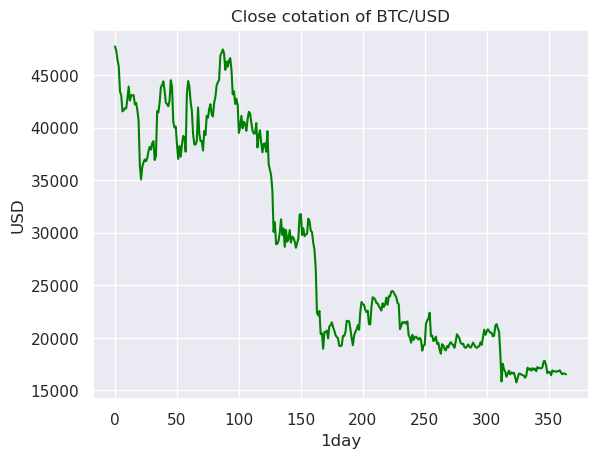

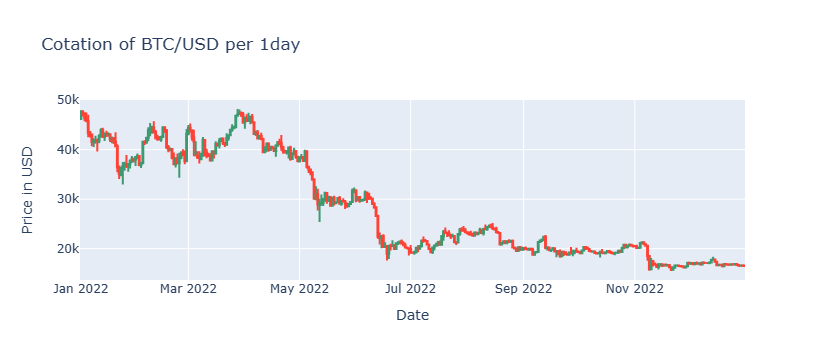

In [50]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

### The Next step is to enrich the Database by adding indicators
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
  

In [51]:

final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


### We can visualize the indicators 

#### EMA Indicator : 

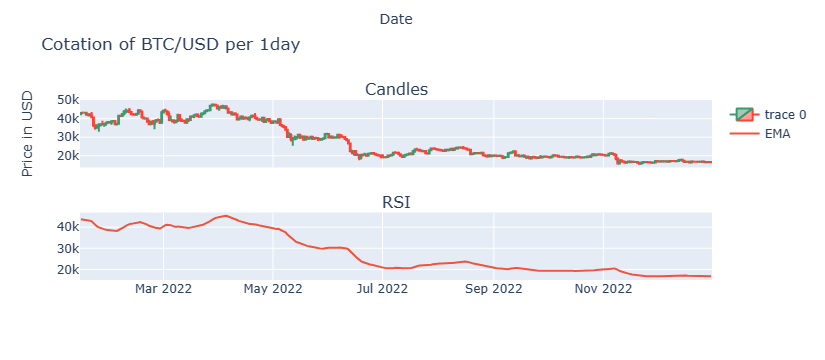

In [52]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### RSI Indicator :

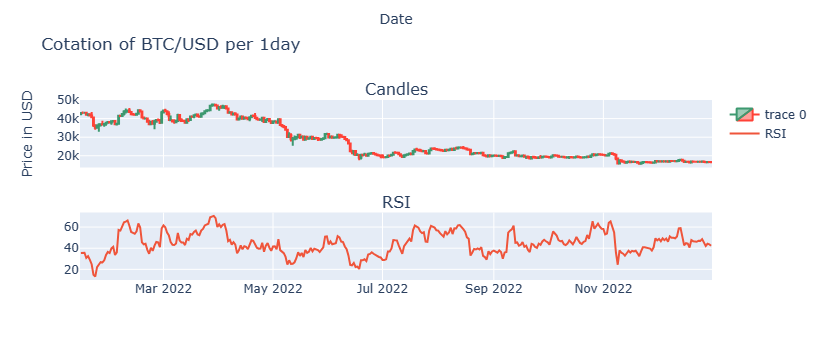

In [53]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ATR Indicator : 

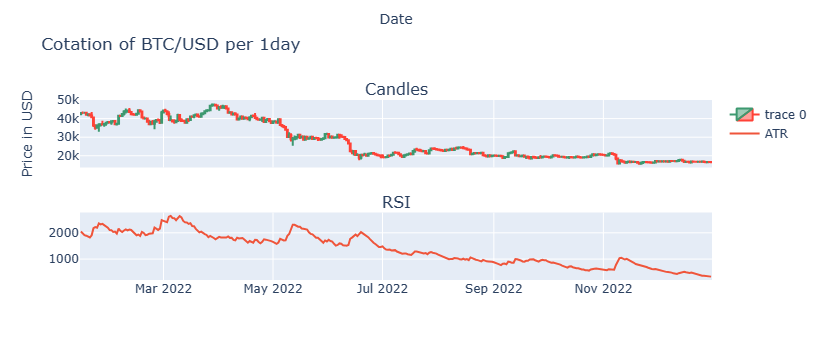

In [54]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

# Prediction Model
#### First of all we have to scale the data for the models
- We recall that we want to predict the close price of Bitcoin

In [55]:

scaled_data = scaling_data(final_data)
scaled_data

NameError: name 'scaling_data' is not defined

#### We can analyse de Covariance Matrix to see the correlation between variables
- It seems that the close price is not too rorrelated with the RSI Indicator

In [56]:

cov_matrix = scaled_data.drop('datetime', axis=1).cov()
sns.heatmap(cov_matrix)
plt.show

NameError: name 'scaled_data' is not defined

#### First Type of Regression : Linear Regression

-We use linear regression to predict the last month out of the past close price of BTCn

In [57]:
prediction_time = 60
scaled_data= shift(scaled_data,prediction_time)


NameError: name 'shift' is not defined

In [58]:
scaled_data.isna().sum() # verifies that we actually shifted 30 days

NameError: name 'scaled_data' is not defined

In [59]:
scaled_data

NameError: name 'scaled_data' is not defined


#### We need to take the past close price to train the model (feature of the model)

In [60]:
price = past_close_price(scaled_data,prediction_time)
price[:10]

NameError: name 'past_close_price' is not defined

#### To train the model we need target data which is the prediction column


In [61]:
target = target_data(scaled_data,prediction_time)
target[:10]

NameError: name 'target_data' is not defined


#### Split the data into 70% for training and 30% for testing the model


price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.7)

In [62]:
lr = LinearRegression().fit(price_train, target_train)

NameError: name 'LinearRegression' is not defined


#### The prediction of future price with the Linear Regression
- We take the last rows of price to predict the future close price


In [63]:
price_future = price[-prediction_time:] 
price_future[:10]

NameError: name 'price' is not defined


#### Now we can visualize the prediction of the last month


In [64]:
lr_prediction = lr.predict(price_future)
print(lr_prediction[:10])

NameError: name 'lr' is not defined

In [65]:
model = pd.DataFrame(scaled_data['close'].tail(prediction_time))
model['prediction'] = lr_prediction

NameError: name 'scaled_data' is not defined

In [66]:
visualize_linear_reg(model,scaled_data)

NameError: name 'visualize_linear_reg' is not defined

In [67]:
target_predict = lr.predict(price_test)
r2 = r2_score(target_test, target_predict)
r2

NameError: name 'lr' is not defined